# Outlier Detection using percentile method

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

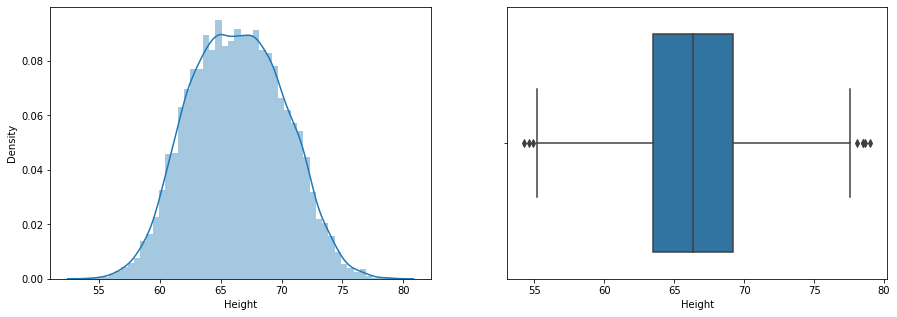

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
sns.boxplot(df['Height'])

In [8]:
#Finding the upper and lower limit

upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)


print('lower limit: ', lower_limit)
print('upper limit: ', upper_limit)

lower limit:  58.13441158671655
upper limit:  74.7857900583366


In [9]:
df[(df['Height']<=58.13) | (df['Height']>=74.78)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [10]:
df_new = df[(df['Height']>=58.13) & (df['Height']<=74.78)]

In [11]:
df_new

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [12]:
df_new['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

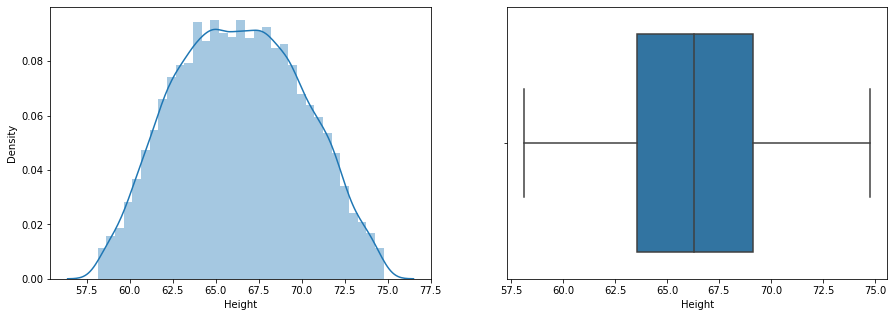

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df_new['Height'])

plt.subplot(1,2,2)
sns.boxplot(df_new['Height'])

# Capping (Also called Winsorization)

In [14]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

df_cap = df.copy()

df_cap['Height'] = np.where(df_cap['Height']>upper_limit , upper_limit , df_cap['Height'])
df_cap['Height'] = np.where(df_cap['Height']<lower_limit , lower_limit , df_cap['Height'])

In [15]:
df_cap.shape

(10000, 3)

In [16]:
df_cap['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

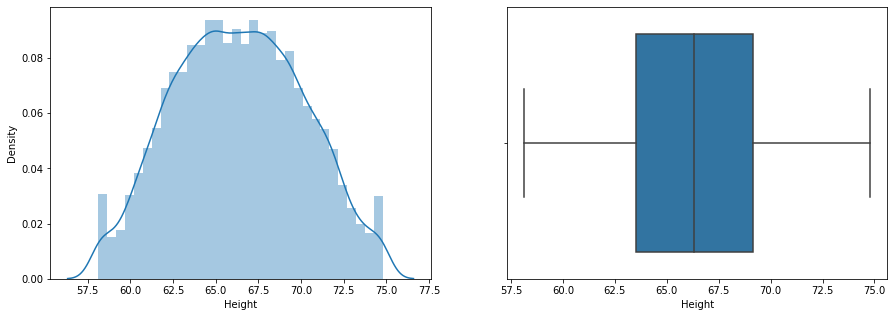

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df_cap['Height'])

plt.subplot(1,2,2)
sns.boxplot(df_cap['Height'])